In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.size'] = 15
pd.set_option('max_colwidth',30)

# Read csv file
data = pd.read_csv('cosmetics.csv', encoding='ISO-8859-1')

# Find ingredients positive for dry skin, and create a new column
data['DryPositive'] = np.where(data['Emollient'] + data['Humectant'] + data['Moisturising'] >= 1, 'positive', 'negative')

# Print the whole table
print(data)

   CosmEthicsID                   InciName            ChemicalName  \
0             1                DIMETHICONE             Dimethicone   
1             2                   GLYCERIN                Glycerol   
2             3         SODIUM HYALURONATE       Hyaluronan Sodium   
3             4           PROPYLENE GLYCOL        Propane-1,2-diol   
4             5                  TREHALOSE  alpha-D-glucopyranosyl   
5             6           BENZOYL PEROXIDE     Dibenzoyl peroxide    
6             7               ETHANOLAMINE          2-Aminoethanol   
7             8          ISOPROPYL ALCOHOL             Propan-2-ol   
8             9              GLYCOLIC ACID             Acetic acid   
9            10  SODIUM LAURETH-12 SULFATE  Sodium laureth sulfate   

    CasNumber   ECNumber  Emollient  Humectant  Moisturising  Eczema  \
0  63148-62-9        NaN          1          0             0       0   
1     56-81-5  200-289-5          0          1             0       0   
2   9067-32-7

In [2]:
# Print chemical name and skin functions
print(data.loc[:, ['ChemicalName', 'DryPositive']])

             ChemicalName DryPositive
0             Dimethicone    positive
1                Glycerol    positive
2       Hyaluronan Sodium    positive
3        Propane-1,2-diol    positive
4  alpha-D-glucopyranosyl    positive
5     Dibenzoyl peroxide     negative
6          2-Aminoethanol    negative
7             Propan-2-ol    negative
8             Acetic acid    negative
9  Sodium laureth sulfate    negative


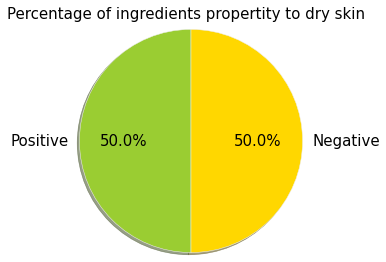

In [3]:
# Calculate the percentage of ingredients positive and negative to dry skin
dry_positive, dry_negative = data.groupby(['DryPositive']).size()
labels = ['Positive', 'Negative']
sizes = [dry_positive, dry_negative]
colors = ['yellowgreen', 'gold']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,)
plt.axis('equal')
plt.suptitle("Percentage of ingredients propertity to dry skin")
plt.show()

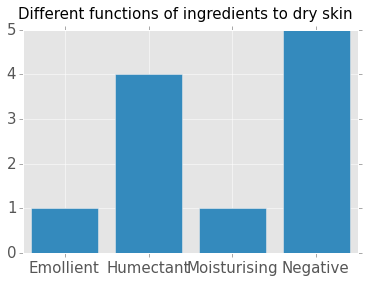

In [4]:
# Calculate functions of ingredients to dry skin
bar_name = [1,2,3,4]
labels = ['Emollient', 'Humectant', 'Moisturising', 'Negative']
sizes = [np.count_nonzero(data['Emollient']), np.count_nonzero(data['Humectant']), np.count_nonzero(data['Moisturising']), dry_negative]

plt.bar(bar_name, sizes, align="center")
plt.xticks(bar_name, labels)
plt.suptitle("Different functions of ingredients to dry skin")
plt.show()

In [5]:
# Find ingredients property to dry skin and Eczema
print(data.loc[:, ['ChemicalName', 'ConfusionMatrix']])

             ChemicalName ConfusionMatrix
0             Dimethicone  False Positive
1                Glycerol  False Positive
2       Hyaluronan Sodium  False Positive
3        Propane-1,2-diol   True Positive
4  alpha-D-glucopyranosyl  False Positive
5     Dibenzoyl peroxide    True Negative
6          2-Aminoethanol   True Negative
7             Propan-2-ol   True Negative
8             Acetic acid   True Negative
9  Sodium laureth sulfate   True Negative
